<a href="https://colab.research.google.com/github/LeonimerMelo/Machine_Learning/blob/Support-Vector-Machines/Support_Vector_Machines_(SVMs)_Examples_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVMs)

An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. Let’s suppose, we have a dataset in which each data point either belongs to one of two classes. Assuming the dataset is linearly separable — the maximal margin classifier tries to find the optimal separating hyperplane, which — as the name implies — maximizes the margin.

In other terms, we are simply looking for a decision boundary that separates the two classes, by maximizing the distance to the closest data point from either class.

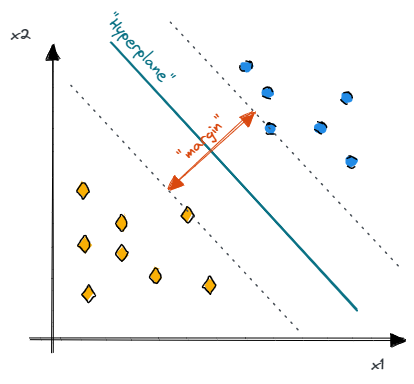

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

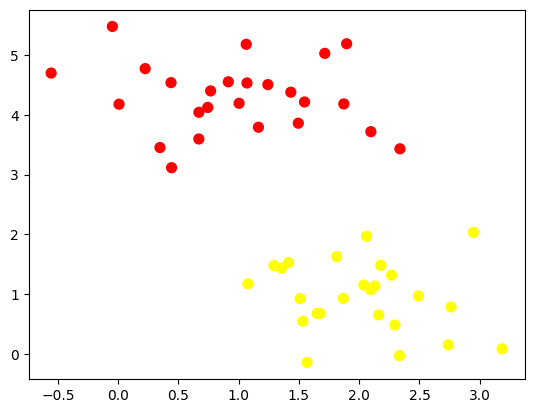

In [ ]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

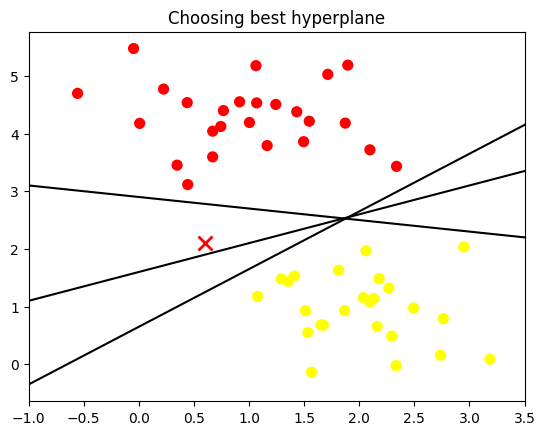

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.title('Choosing best hyperplane')
plt.show()

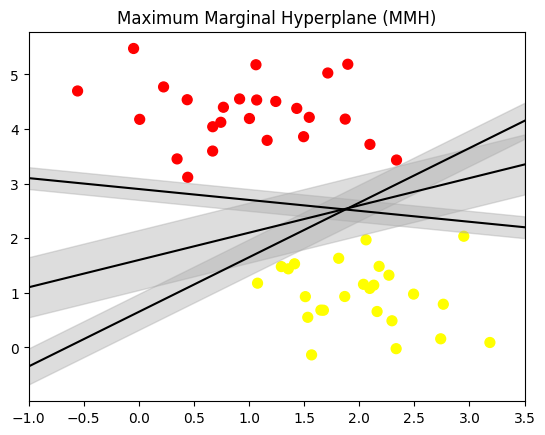

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)
plt.title('Maximum Marginal Hyperplane (MMH)')
plt.show()

## How do we find the optimal hyperplane?

Since our dataset can be perfectly separated using a hyperplane and any hyperplane can be shifted and rotated by a tiny nudge, we are therefore provided with an infinite amount of possible solutions to choose from.

Thus, we need a reasonable way to decide which of the possible hyperplanes to use.

Loosely speaking, the optimal separating hyperplane is the solution that is farthest away from the closest data point — or in other terms which maximizes the margin.

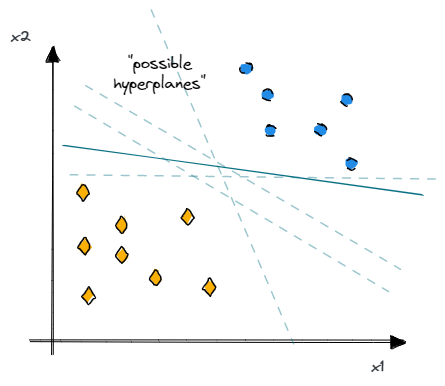

In [ ]:
# "Support vector classifier"
from sklearn.svm import SVC
# create a linear kernel model
model = SVC(kernel='linear', C=1E10)
# fit model with dataset
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

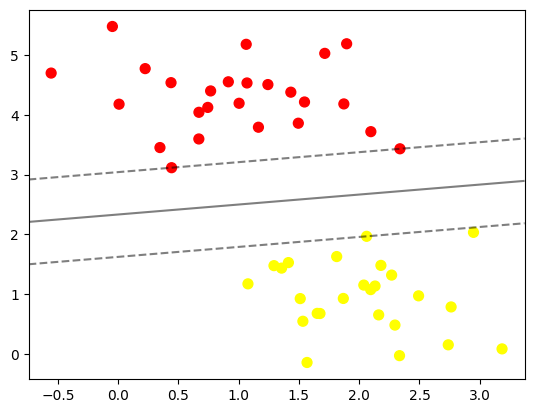

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin.


These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. In Scikit-Learn, the identity of these points are stored in the ```support_vectors_``` attribute of the classifier:

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset.

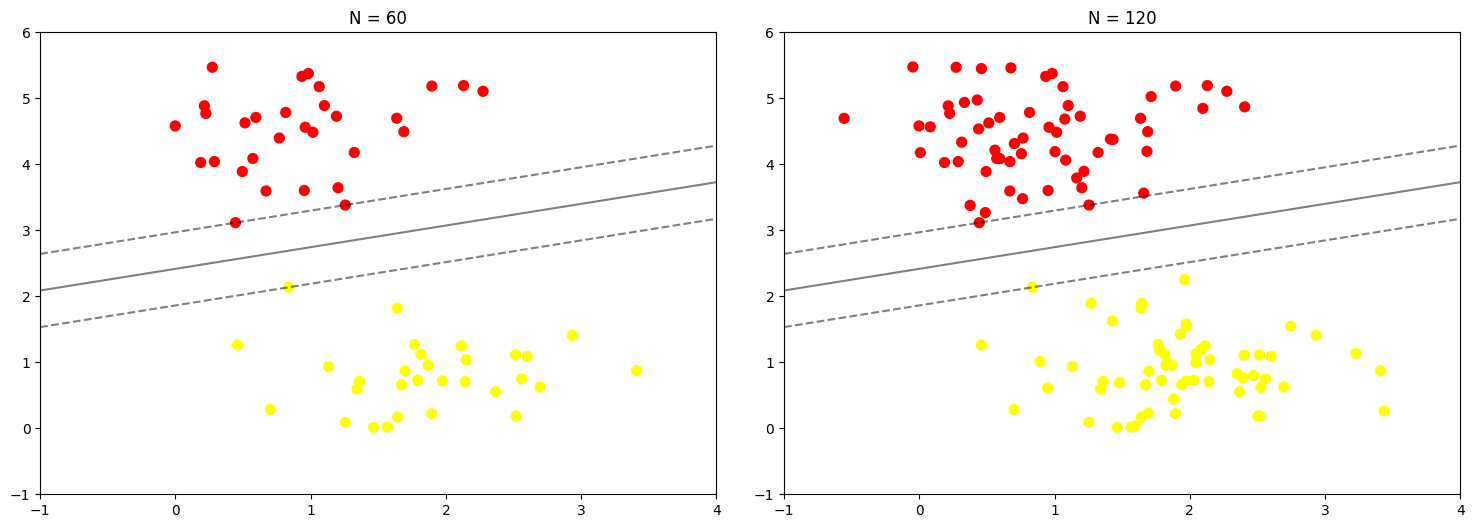

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In the left panel, we see the model and the support vectors for 60 training points. In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel. This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

## SVM Kernels

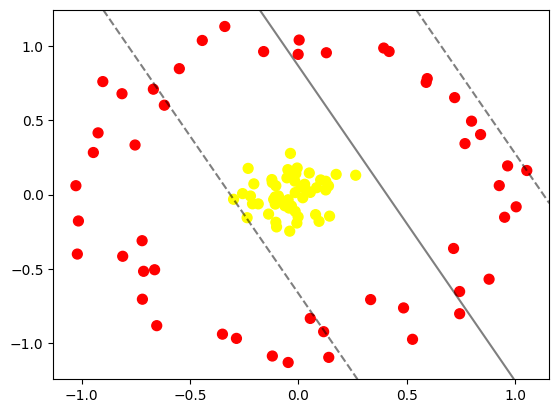

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)
plt.show()

It is clear that no linear discrimination will ever be able to separate this data.

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter.

In [ ]:
clf = SVC(kernel='rbf', C=1)
clf.fit(X, y)

SVC(C=1)

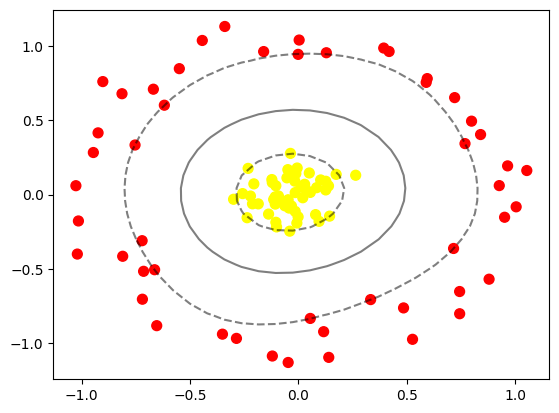

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
plt.show()

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

#Exercícios

Baixe o dataset `wine_fraud.csv` no Kaggle [1], o qual está relacionado a adulteração/fraudes em vinhos, para classificar qual amostra é adulterada ou não.
Você deverá utilizar o algoritmo SVM (Support Vector Machine) para classificá-lo.

Neste exercício, você deverá:
- Ler o dataset `wine_fraud.csv`;
- Identificar quais são as variáveis para serem preditas;
- Verificar se as classes estão balanceadas ou não (Obs.: verifique que há dois tipos de vinho: tinto e branco);
- Verifique qual o percentual de fraude em vinhos tintos e brancos;
- Converta as colunas categóricas para uso do algoritmo;
- Separe o dataset entre treino/teste, considerando percentual de 30% para teste;
- Realize o standard scale;
- Varie os hiperparâmetros do algoritmo SVM: ```param_grid = {'kernel':['linear','rbf', 'sigmoid'], 'C': [0.01, 0.1, 0.5, 1, 2], 'gamma': ['scale', 'auto']}``` e analise o desempenho. Qual foi o melhor obtido? Para todos, verificar performance (acurácia, F1-Score, precision e recall).
  - **kernel** - Specifies the kernel type to be used in the algorithm.
  - **gamma** - Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
  - **C** - Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
- Tire as conclusões.

#Referências

[1] https://www.kaggle.com/datasets/asmaabdolahpoor/wine-fraud

[2] https://www.kaggle.com/code/prashant111/svm-classifier-tutorial

[3] https://scikit-learn.org/stable/modules/svm.html

[4] https://en.wikipedia.org/wiki/Support_vector_machine

[5] https://www.geeksforgeeks.org/support-vector-machine-algorithm/

[6] https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm

